This example demonstrates how to simulate steady channel flow ~under 20 lines of code!~ We recommend using a Python notebook (`.ipynb`) for an interactive experience.

### 1. Define the Geometry and Physics

First, define the geometries of your domain. Then, attach the boundary conditions and the governing PDE to the geometric entities.

In [15]:
import deepflow as df
df.manual_seed(69)

# Define the area and bounds
rectangle = df.geometry.rectangle([0, 5], [0, 1])
domain = df.domain(rectangle)

# Define the physics at the geometry
domain.bound_list[0].define_bc({'u': 1, 'v': 0})
domain.bound_list[1].define_bc({'u': 0, 'v': 0})
domain.bound_list[2].define_bc({'p': 0})
domain.bound_list[3].define_bc({'u': 0, 'v': 0})
domain.area_list[0].define_pde(df.pde.NavierStokes(U=0.0001, L=1, mu=0.001, rho=1000))

Next, sample the collocation points. This will automatically create training data according to the defined physics.

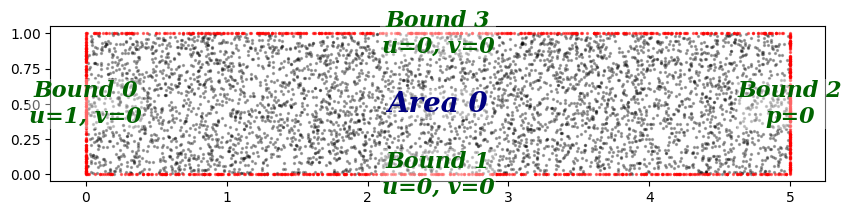

In [16]:
domain.sampling_random([200, 400, 200, 400], [5000])
domain.show_coordinates(display_conditions=True)  # display

Create the PINN model

In [17]:
model0 = df.PINN(width=32, length=4)

In [18]:
model1, model1best = model0.train_adam(calc_loss=df.calc_loss_simple(domain), learning_rate=0.004, epochs=2000)

Epoch: 1, total_loss: 0.98882, bc_loss: 0.98858, pde_loss: 0.00024
Epoch: 200, total_loss: 0.09944, bc_loss: 0.07822, pde_loss: 0.02123
Epoch: 400, total_loss: 0.05284, bc_loss: 0.03609, pde_loss: 0.01675
Epoch: 600, total_loss: 0.02556, bc_loss: 0.02068, pde_loss: 0.00487
Epoch: 800, total_loss: 0.01918, bc_loss: 0.01568, pde_loss: 0.00350
Epoch: 1000, total_loss: 0.01726, bc_loss: 0.01414, pde_loss: 0.00312
Epoch: 1200, total_loss: 0.01243, bc_loss: 0.01050, pde_loss: 0.00193
Epoch: 1400, total_loss: 0.01084, bc_loss: 0.00923, pde_loss: 0.00162
Epoch: 1600, total_loss: 0.00858, bc_loss: 0.00733, pde_loss: 0.00125
Epoch: 1800, total_loss: 0.01745, bc_loss: 0.01431, pde_loss: 0.00315
Epoch: 2000, total_loss: 0.00643, bc_loss: 0.00540, pde_loss: 0.00103


After training, you can easily visualize the flow field and training history.

In [19]:
area_eval = domain.area_list[0].evaluate(model1best)
area_eval.sampling_area([500, 100])

bound_eval = domain.bound_list[2].evaluate(model1best)
bound_eval.sampling_line(100)

Available data keys: ('u', 'v', 'p', 'PDE residual', 'x', 'y', 'u_x', 'u_y', 'v_x', 'v_y', 'p_x', 'p_y', 'continuity_residual', 'x_momentum_residual', 'y_momentum_residual', 'total_loss', 'bc_loss', 'pde_loss')
Available data keys: ('u', 'v', 'p', 'BC residual', 'x', 'y', 'total_loss', 'bc_loss', 'pde_loss')


C:\Users\thamm\OneDrive\Documents\1 - Projects\0 - STEM\2 - Numerical Physics\9 - PINNs\deepflow\src\deepflow\visualization.py:52: RuntimeWarning: divide by zero encountered in scalar divide
  ratio = np.ptp(self.Y) / np.ptp(self.X)


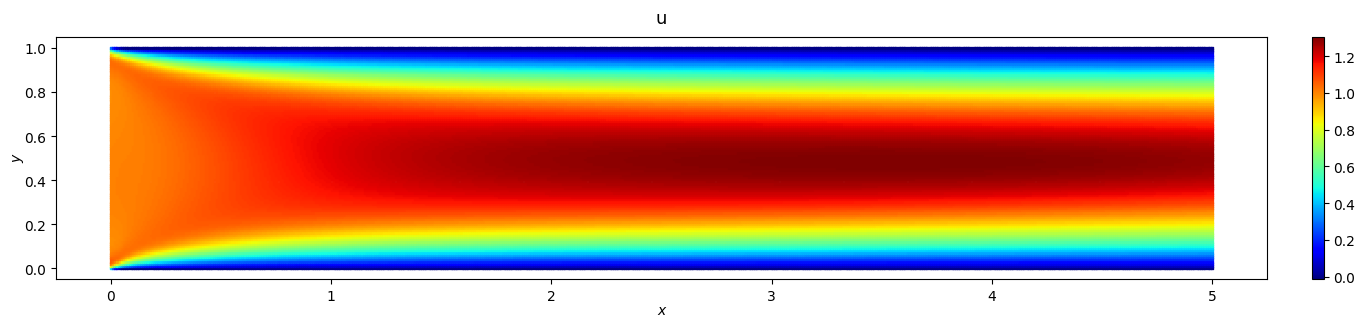

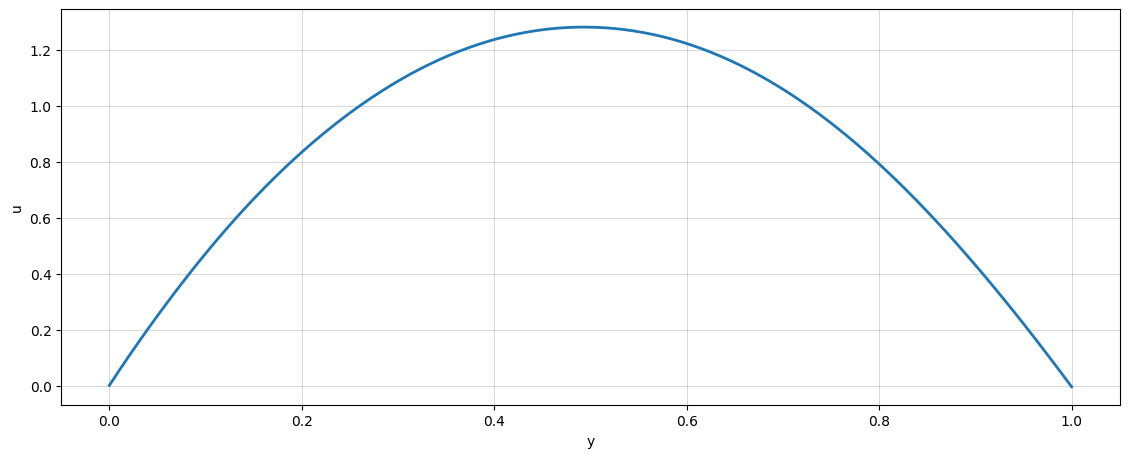

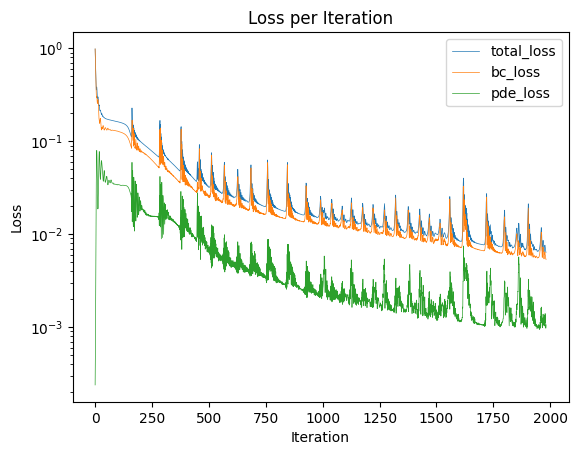

In [21]:
flow_field_plot = area_eval.plot_color({'u': 'jet'}) # plot 2d color plot
u_plot = bound_eval.plot('u', axis='y')
loss_curve_plot = area_eval.plot_loss_curve(log_scale=True) # plot loss curve